In [15]:
import matplotlib.pyplot as plt
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure.bandstructure import BandStructure
import numpy as np
with MPRester("z18b57ZwfPDtXJVD") as m: 
    bdstr = m.get_bandstructure_by_material_id("mp-569779")

 1.DETERMINATION DE LA BANDE INTERDITE


La bande interdite est définie comme la différence d'énergie entre le minimum de la bande de conduction (point rouge) et le maximum de la bande de valence (point vert). Si il n'y a pas de bande interdite, notre matériaux est considéré comme un métal.
 La bande interdite est dit indirecte car le minimum de la bande de conduction ne se situe pas sur le même vecteur d'onde que le maximum de la bande de valence. Ce qui signigie qu'il faut plus d'énergie pour passer de la bande de valence à la bande de conduction si on ne considère que des intéractions avec des photons. La transition se fait selon la direction \Gamma-(0.495,-0.000,0.495) où Γ et (0.495,-0.000,0.495) sont des vecteurs d'onde. 
Le gap  d'énergie a une valeur de 0.015500000000000291 eV. Cette énergie étant faible mais pas nul, notre matériaux est donc un semi conducteur.
Remarque : il y a  2 points verts car on passe 2 fois par le vecteur d'onde Γ lors du parcours de la surface de Fermi

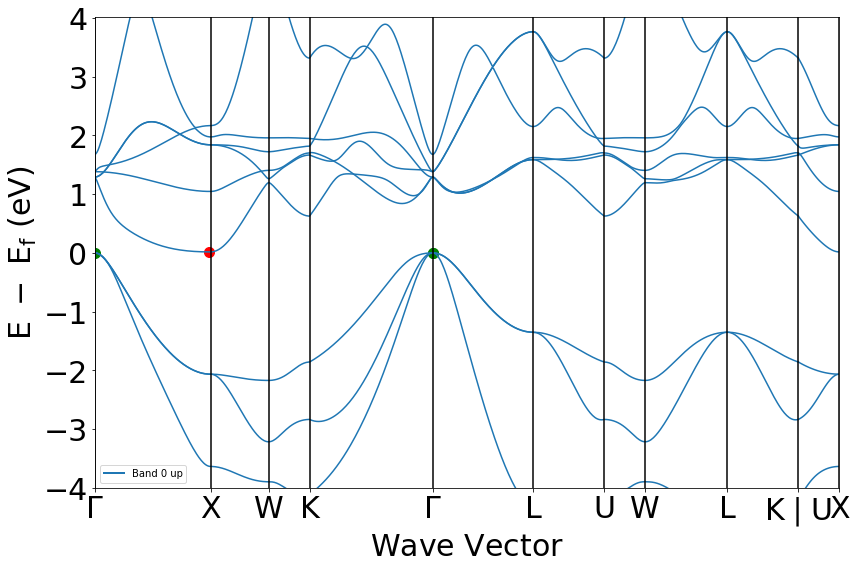

In [74]:
#Détermination de la bande interdite
bdgp = bdstr.get_band_gap() #recherche les informations concernant la  bande interdite
bplot= BSPlotter(bdstr).get_plot(vbm_cbm_marker=True) #affiche les maxima et minima sur le diagramme de bande

print(" 1.DETERMINATION DE LA BANDE INTERDITE")
print('\n')
print("La bande interdite est définie comme la différence d'énergie entre le minimum de la bande de conduction (point rouge) et le maximum de la bande de valence (point vert). Si il n'y a pas de bande interdite, notre matériaux est considéré comme un métal.")
print(" La bande interdite est dit indirecte car le minimum de la bande de conduction ne se situe pas sur le même vecteur d'onde que le maximum de la bande de valence. Ce qui signigie qu'il faut plus d'énergie pour passer de la bande de valence à la bande de conduction si on ne considère que des intéractions avec des photons. La transition se fait selon la direction", bdgp.get('transition'), "où Γ et (0.495,-0.000,0.495) sont des vecteurs d'onde. \nLe gap  d'énergie a une valeur de", bdgp['energy'],"eV. Cette énergie étant faible mais pas nul, notre matériaux est donc un semi conducteur.")
print("Remarque : il y a  2 points verts car on passe 2 fois par le vecteur d'onde Γ lors du parcours de la surface de Fermi.")
print('\n')
print("Diagramme de la structure de bande du ScSbPd:")
print("-------------------------------------")
bplot.show()


[0.0, 0.9853562636385541, 0.9853562636385541, 1.4780343954578317, 1.4780343954578317, 1.8264104434095616, 1.8264104434095616, 2.8715385872652, 2.8715385872652, 3.724882143354301, 3.724882143354301, 4.328287158546775, 4.328287158546775, 4.67666320649851, 4.67666320649851, 5.37341530240198, 5.37341530240198, 5.976820317594466, 6.325196365546348]
 2. DISPERSION


 La direction avec la plus forte dispersion est la direction qui observe la plus forte pente sur le diagramme des bandes. A l'inverse, la direction avec la dispersion la plus faible est celle avec la pente la plus faible. La dispersion d'une particule (ici un électron) par rapport à k nous donne des indications sur la densité d'état, la masse effective et donc la mobilité de cette particule. En effet, si la dispersion est faible, la densité d'état va être élevée. La masse effective de l'électron va alors augmenter et diminuer sa mobolité.


La pente la plus forte sur la dernière bande de valence est - 2.0973124911885326 . Ce qui 

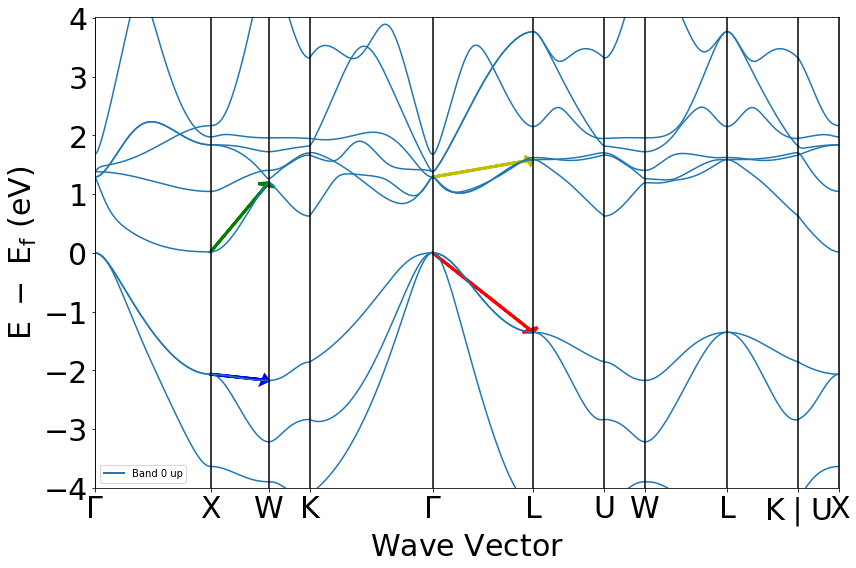

In [96]:
bandplot = BSPlotter(bdstr)
data = bandplot.bs_plot_data()
en = data.get('energy')
vbm = bdstr.get_vbm()
cbm = bdstr.get_cbm()
bande_val_ind = list(vbm['band_index'].values())[0]
bande_cond_ind = list(cbm['band_index'].values())[0]
D = data.get('ticks').get('distance')

print(D)

pente_Val = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
pente_Con = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]

dist = np.array([D[1]-D[0] , D[3]-D[2] , D[5]-D[4] , D[7]-D[6] , D[9]-D[8] , D[11]-D[10], D[13]-D[12], D[15]-D[14], D[17]-D[16], D[18]-D[17] ])
#Attention car certains vecteurs d'onde sont à la même distance de l'origine donc la distance entre 2 de ses vecteurs est nul.  Ce qui pose problème pour calculer la pente
#print(dist)

for i in range(0,10):
    pente_Val[i] =abs((en.get('1')[i][bande_val_ind[-1]][-1] - en.get('1')[i][bande_val_ind[-1]][0])/dist[i]) #calcule des pentes en valeur absolue
    pente_Con[i] =abs((en.get('1')[i][bande_cond_ind[0]][-1] - en.get('1')[i][bande_cond_ind[0]][0])/dist[i])
    
#print(pente_Val)

#print(pente_Con)
    
maxVal = np.amax(pente_Val) #determine la pente maximale dans la bande de valence
minVal = np.amin(pente_Val) #determine la pente minimale dans la bande de valence


maxCon = np.amax(pente_Con) #determine la pente maximale dans la bande de conduction
minCon = np.amin(pente_Con) #determine la pente minimale dans la bande de conduction


bandplot.get_plot()
#max dispersion valence
plt.arrow(D[7], (en.get('1')[4][bande_val_ind[-1]])[0], dist[4], en.get('1')[4][bande_val_ind[-1]][-1] - en.get('1')[4][bande_val_ind[-1]][0], color = 'r', head_width=0.15, head_length=0.05, linewidth=3,length_includes_head=True)
#min dipersion valence
plt.arrow(D[1], (en.get('1')[1][bande_val_ind[-1]])[0], dist[1], en.get('1')[1][bande_val_ind[-1]][-1] - en.get('1')[1][bande_val_ind[-1]][0], color = 'b', head_width=0.15, head_length=0.05, linewidth=3,length_includes_head=True)
#max dispersion conduction
plt.arrow(D[1], (en.get('1')[1][bande_cond_ind[0]])[0], dist[1], en.get('1')[1][bande_cond_ind[0]][-1] - en.get('1')[1][bande_cond_ind[0]][0], color = 'g', head_width=0.15, head_length=0.05, linewidth=3,length_includes_head=True)
#min dispersion conduction
plt.arrow(D[7], (en.get('1')[4][bande_cond_ind[0]])[0], dist[4], en.get('1')[4][bande_cond_ind[0]][-1] - en.get('1')[4][bande_cond_ind[0]][0], color = 'y', head_width=0.15, head_length=0.05, linewidth=3,length_includes_head=True)


print(" 2. DISPERSION")
print('\n')
print(" La direction avec la plus forte dispersion est la direction qui observe la plus forte pente sur le diagramme des bandes. A l'inverse, la direction avec la dispersion la plus faible est celle avec la pente la plus faible. La dispersion d'une particule (ici un électron) par rapport à k nous donne des indications sur la densité d'état, la masse effective et donc la mobilité de cette particule. En effet, si la dispersion est faible, la densité d'état va être élevée. La masse effective de l'électron va alors augmenter et diminuer sa mobolité.")
print('\n')
print("La pente la plus forte sur la dernière bande de valence est -" , maxVal , ". Ce qui correspond à la direction Γ-L (flèche rouge sur le graphe). ")
print('\n')
print("La pente la plus faible sur la dernière bande de valence est -" , minVal , ". Ce qui correspond à la direction X-W (flèche bleu sur le graphe). ")
print('\n')
print("La pente la plus forte sur la dernière bande de conduction est " , maxCon , ". Ce qui correspond à la direction X-W (flèche verte sur le graphe). ")
print('\n')
print("La pente la plus faible sur la dernière bande de conduction est " , minCon , ". Ce qui correspond à la direction Γ-L (flèche jaune sur le graphe). ")
print('\n')
print(" ")

Commençons par préciser que l'énergie est une fonction de la fonction d'onde et nous l'approximons par une trajectoire parabolique telle que E(k) = ak² + bk + c.
En démarant ensuite de l'équation bien connue de la physique quantique E =  (h²k²)/(8π²m), on peut facilement isolé la masse 'm'. Si on dérive 2x l'expression, on trouve que m = (dk²*h²)/(4π²*d²E). Mais connaissant l'expressions de E(k), on déduit que m = h²/8aπ² où 'a' est le coefficient quadratique de E(k).
Avec une extrapolation sur 3 points, on trouve facilement le coefficient a. La valeur de ce coefficieent varie lorsqu'on se déplace sur les bandes et entre les différentes bandes. C'est pourquoi la valeur de la masse varie elle aussi en fonction de la bande où l'on prend la mesure.


Dans le cas du point situé au maximum de la bande de valence (courbe verte), la dérivée seconde de l'énergie vaut donc  -9.403339252528339  eV.Ansgtröm ². Ce qui équivaut à  -1.5064149482550398e-38  J/m
La masse effective de l'électron devien

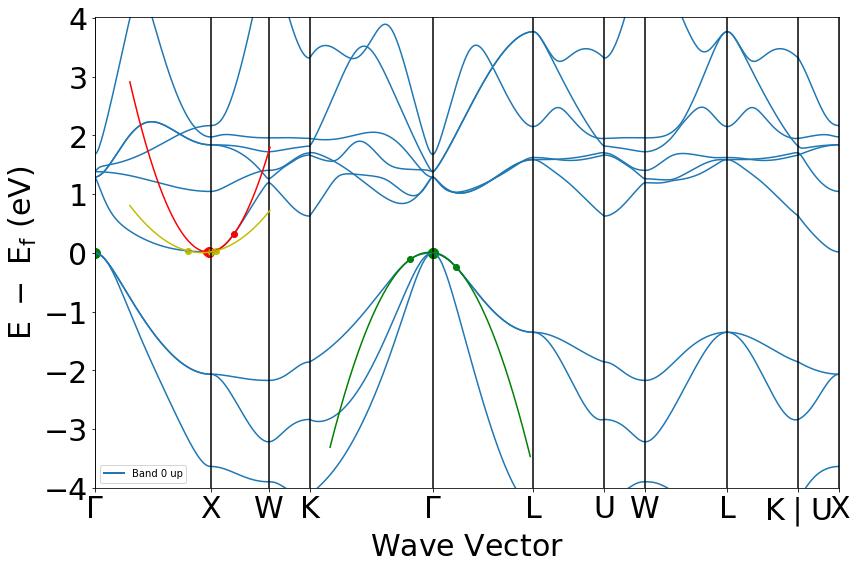

In [123]:
#BANDE DE  VALENCE

Xv = [data.get('distances')[3][-20],data.get('distances')[4][1],data.get('distances')[4][20]]
Yv = [en.get('1')[3][bande_val_ind[-1]][-20], en.get('1')[4][bande_val_ind[-1]][0], en.get('1')[4][bande_val_ind[-1]][20]]

#Approximation de coefficient de E(k) pour la bande de valence
av = np.polyfit(Xv,Yv,2)[0]
bv = np.polyfit(Xv,Yv,2)[1]
cv = np.polyfit(Xv,Yv,2)[2]


var_kv = np.arange(2,3.7,0.01)
E_v = av*var_kv**2 + bv*var_kv + cv


av_SI = 2*av*(1.602*10**(-19))*(10**(-10))**2 #transformation du coefficient 'a' des unités atomiques vers les unité du SI

hbar = 1.054*10**(-34) # constante de PLanck réduite en [J/s]
m_elec = 9.109E-31 #masse d'un electron [kg]

mv_eff_elc = (hbar**2)/av_SI
coefv = mv_eff_elc / m_elec




#BANDE DE CONDUCTION
#premiere extrapolation 

Xc = [ data.get('distances')[0][-5],data.get('distances')[0][-1],data.get('distances')[1][20]]
Yc = [ en.get('1')[0][bande_cond_ind[0]][-5], en.get('1')[0][bande_cond_ind[0]][-1], en.get('1')[1][bande_cond_ind[0]][20]]

ac = np.polyfit(Xc,Yc,2)[0]
bc = np.polyfit(Xc,Yc,2)[1]
cc = np.polyfit(Xc,Yc,2)[2]

var_kc = np.arange(0.3,1.5,0.01)
E_c = ac*var_kc**2 + bc*var_kc + cc

ac_SI = 2*ac*(1.602*10**(-19))*(10**(-10))**2

mc_eff_elc = (hbar**2)/ac_SI
coefc = mc_eff_elc / m_elec

#seconde extrapolation

Xc2 = [ data.get('distances')[0][-20],data.get('distances')[0][-1],data.get('distances')[1][5]]
Yc2 = [ en.get('1')[0][bande_cond_ind[0]][-20], en.get('1')[0][bande_cond_ind[0]][-1], en.get('1')[1][bande_cond_ind[0]][5]]

ac2 = np.polyfit(Xc2,Yc2,2)[0]
bc2 = np.polyfit(Xc2,Yc2,2)[1]
cc2 = np.polyfit(Xc2,Yc2,2)[2]

var_kc2 = np.arange(0.3,1.5,0.01)
E_c2 = ac2*var_kc2**2 + bc2*var_kc2 + cc2

ac_SI2 = 2*ac2*(1.602*10**(-19))*(10**(-10))**2

mc_eff_elc2 = (hbar**2)/ac_SI2
coefc2 = mc_eff_elc2 / m_elec



print("Commençons par préciser que l'énergie est une fonction de la fonction d'onde et nous l'approximons par une trajectoire parabolique telle que E(k) = ak² + bk + c.")
print("En démarant ensuite de l'équation bien connue de la physique quantique E =  (h²k²)/(8π²m), on peut facilement isolé la masse 'm'. Si on dérive 2x l'expression, on trouve que m = (dk²*h²)/(4π²*d²E). Mais connaissant l'expressions de E(k), on déduit que m = h²/8aπ² où 'a' est le coefficient quadratique de E(k).")
print("Avec une extrapolation sur 3 points, on trouve facilement le coefficient a. La valeur de ce coefficieent varie lorsqu'on se déplace sur les bandes et entre les différentes bandes. C'est pourquoi la valeur de la masse varie elle aussi en fonction de la bande où l'on prend la mesure.")
print('\n')
print("Dans le cas du point situé au maximum de la bande de valence (courbe verte), la dérivée seconde de l'énergie vaut donc " , 2*av ," eV.Ansgtröm ². Ce qui équivaut à ",av_SI," J/m" )
print("La masse effective de l'électron devient alors", mv_eff_elc,"kg. Ceci correspond à", coefv, "fois la masse d'un électron libre. La masse négative peut surprendre mais elle représente la masse d'un trou. Etant 'plus léger', le trou a gagné en mobilité.")

print('\n')
print("Dans le cas du point situé au minimum de la bande de conduction avec une première extrapolation (courbe  rouge), la dérivée seconde de l'énergie vaut donc " , 2*ac ," eV.Ansgtröm ². Ce qui équivaut à ",ac_SI," J/m." )
print("La masse effective de l'électron devient alors", mc_eff_elc,"kg. Ceci correspond à", coefc, "fois la masse d'un électron libre. Etant 'plus léger', l'électron a gagné en mobilité.")

print("Il est bon de remarquer que l'extrapolation sur le minima de la bande de conduction est fortement influencé par le choix des points sur la bande d'énergie qui servent à l'extrapolation. De ce fait, la masse effective est totalement différente en fonction des points choisis.")
print("Dans un 2e cas (courbe jaune), on peut trouver une masse effective de", mc_eff_elc2,"kg, correspondandt à", coefc2, "fois la masse d'un électron libre. Cette masse effective plus élevée que celle de l'électron classique signifie que dans cette situation, l'électron est moins mobile dans le cristal. Ce qui est très différent de ce qu'on a trouvé précédemment.")


bplot = BSPlotter(bdstr).get_plot(vbm_cbm_marker=True)
plt.plot(var_kv, E_v,color ='g')
plt.scatter(Xv,Yv, color = 'g')
plt.plot(var_kc, E_c,color ='r')
plt.scatter(Xc,Yc, color = 'r')
plt.plot(var_kc2, E_c2,color ='y')
plt.scatter(Xc2,Yc2, color = 'y')
bplot.show()